# Plotting Notebook

In [52]:
import matplotlib.pyplot as plt
from encrypt_decrypt_files import main
import time

In [56]:
def get_average_run_time(func, iterations, input):
    start = time.time()
    for i in range(iterations):
        func(*input)
    end = time.time()
    average_run_time = round(((end - start) * 1000) / iterations, 5) 

    return average_run_time # in milliseconds

In [59]:
from pathlib import Path


N = [64, 128, 256, 512, 1024, 2048]

key_file = Path("jakenef.public.txt")
message_file = Path("1Nephi.txt")
output_file = Path("benchmark_output.txt")

input_args = (key_file, message_file, output_file)

function_round_times = {
    bit_amount : get_average_run_time(main, 1, input_args)
    for bit_amount in N
}

0.026397228240966797 seconds elapsed
0.02380514144897461 seconds elapsed
0.035819053649902344 seconds elapsed
0.02202439308166504 seconds elapsed
0.016618967056274414 seconds elapsed
0.016408205032348633 seconds elapsed


In [60]:
print(function_round_times)

{64: 29.02889, 128: 24.23811, 256: 37.323, 512: 22.81713, 1024: 17.05694, 2048: 16.93225}


7.519007420569323e-09


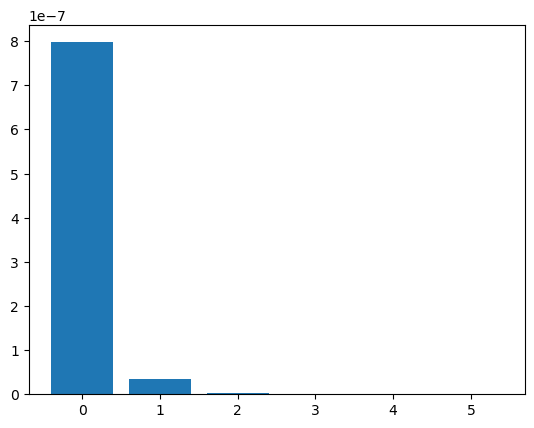

In [ ]:
# Estimate k
# O(n)
# kk = [y / (insert theoretical guess of n) for n, y in function_round_times.items()]
encrypt = {
    64: 13.37600,
    128: 9.49025,
    256: 8.48103,
    512: 16.37793,
    1024: 28.74231,
    2048: 34.93714
}
decrypt = {
    64: 395.66207,
    128: 894.23227,
    256: 2713.40394,
    512: 8215.32679,
    1024: 29534.30200,
    2048: 99064.95285
}

kk = [y / n**4 for n, y in encrypt.items()]
plt.bar(range(len(kk)), kk)

k_theory = sum(kk[1:])/len(kk[1:]) 
print(k_theory) # Measured constant of proportionality for theoretical order (when using theoretial in n spot, then empirical when use it again)

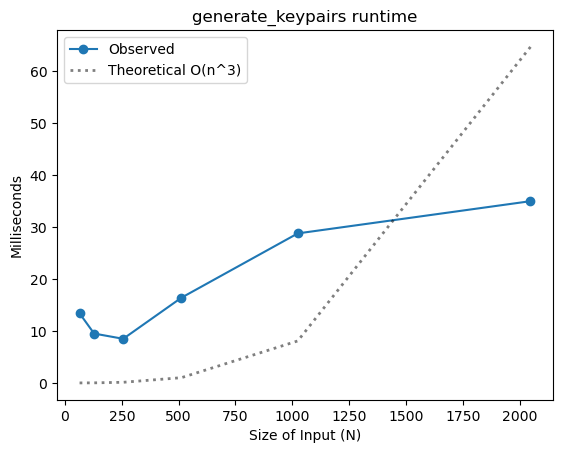

In [67]:
plt.plot(
    encrypt.keys(),
    encrypt.values(),
    marker='o'
)

def theory(n):
    return k_theory * n

# theory_y = [theory(x) for x in function_round_times.keys()]
theory_y = [k_theory * (x**3) for x in encrypt.keys()]

plt.plot(
    encrypt.keys(),
    theory_y,
    c='k',
    ls=':',
    lw=2,
    alpha=0.5
)

plt.legend(['Observed', 'Theoretical O(n^3)'])
plt.xlabel('Size of Input (N)')
plt.ylabel('Milliseconds')
plt.title('generate_keypairs runtime');

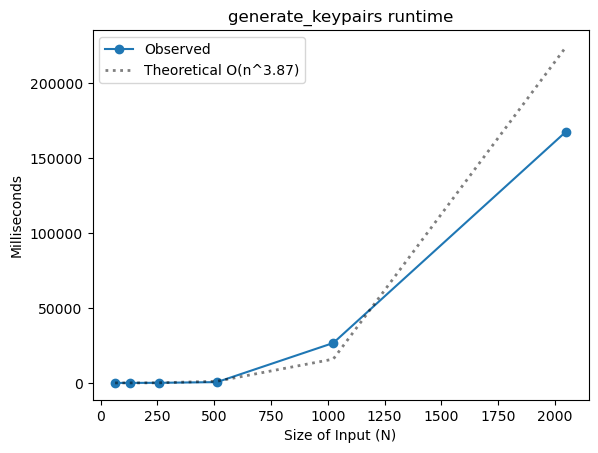

In [50]:
plt.plot(
    function_round_times.keys(),
    function_round_times.values(),
    marker='o'
)

def theory(n):
    return k_theory * n

# theory_y = [k_theory * (insert theory guess here) for x in function_round_times.keys()]

theory_y = [k_theory * (x**3.82) for x in function_round_times.keys()]

plt.plot(
    function_round_times.keys(),
    theory_y,
    c='k',
    ls=':',
    lw=2,
    alpha=0.5
)

plt.legend(['Observed', 'Theoretical O(n^3.82)'])
plt.xlabel('Size of Input (N)')
plt.ylabel('Milliseconds')
plt.title('generate_keypairs runtime');

# this gives you - Empirical order of growth (if different from theoretical): (n^3.2323) something lower, match line


6.740673680127171e-08


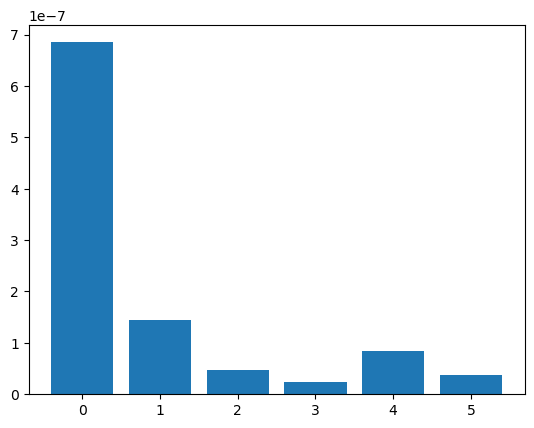

In [51]:
# Estimate k
# O(n)
# kk = [y / (insert theoretical guess of n) for n, y in function_round_times.items()]

kk = [y / n**3.82 for n, y in function_round_times.items()]
plt.bar(range(len(kk)), kk)

k_theory = sum(kk[1:])/len(kk[1:]) 
print(k_theory) # Measured constant of proportionality for theoretical order (when using theoretial in n spot, then empirical when use it again)